In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [328]:
df_test = pd.read_csv('../data/test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [329]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [330]:
df_test_passenger_id_list = df_test['PassengerId'].to_list()

In [331]:
df_train = pd.read_csv('../data/train.csv')
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [332]:
df = pd.concat([df_train, df_test])

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


# Handel missing values

In [334]:
df.isna().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

<Axes: >

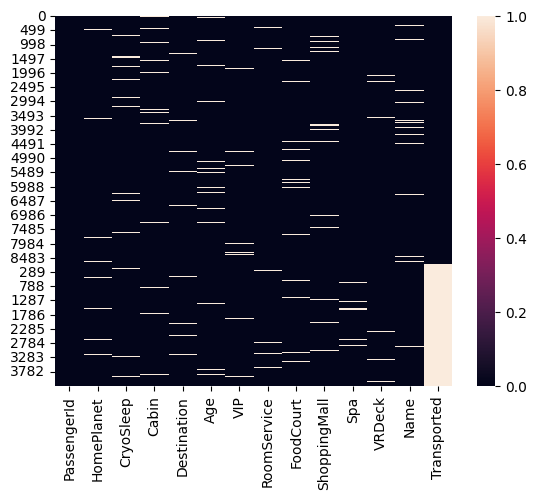

In [335]:
sns.heatmap(df.isna())

In [336]:
df['passenger_group'] = df['PassengerId'].str.split('_', n=1, expand=True)[0]
df['passenger_number_in_group'] = df['PassengerId'].str.split('_', n=1, expand=True)[1]

In [337]:
df['total_luxury_amenities'] = df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)

In [338]:
df['deck'] = df['Cabin'].str.split('/', n=2, expand=True)[0]
df['num'] = df['Cabin'].str.split('/', n=2, expand=True)[1]
df['side'] = df['Cabin'].str.split('/', n=2, expand=True)[2]

In [339]:
df['first name'] = df['Name'].str.split(' ', n=1, expand=True)[0]
df['last name'] = df['Name'].str.split(' ', n=1, expand=True)[1]

In [340]:
passenger_group_count = df['passenger_group'].value_counts().to_dict()


In [341]:
df['group_size'] = df['passenger_group'].map(passenger_group_count)

In [342]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,passenger_group,passenger_number_in_group,total_luxury_amenities,deck,num,side,first name,last name,group_size
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,False,0001,01,0.0,B,0,P,Maham,Ofracculy,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,True,0002,01,736.0,F,0,S,Juanna,Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,False,0003,01,10383.0,A,0,S,Altark,Susent,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,False,0003,02,5176.0,A,0,S,Solam,Susent,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,True,0004,01,1091.0,F,1,S,Willy,Santantines,1


# Home Planet

In [343]:
df.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [344]:
df.groupby(['passenger_group'] )['HomePlanet'].nunique().sort_values(ascending=False).reset_index(name='count')

,passenger_group,count
0,9264,1
1,9263,1
2,9262,1
3,9261,1
4,9260,1
...,...,...
9275,0303,0
9276,0242,0
9277,0251,0
9278,0210,0


In [345]:
grouped_home_planet=df.groupby(['passenger_group','HomePlanet'] )['HomePlanet'].nunique().sort_values(ascending=False).reset_index(name='count')
grouped_home_planet

,passenger_group,HomePlanet,count
0,9280,Europa,1
1,0001,Europa,1
2,0002,Earth,1
3,0003,Europa,1
4,9263,Earth,1
...,...,...,...
9119,0009,Mars,1
9120,0008,Europa,1
9121,0007,Earth,1
9122,0006,Earth,1


In [346]:
df = df.drop('HomePlanet', axis = 1)
df = df.merge(grouped_home_planet[['passenger_group', 'HomePlanet']], on='passenger_group', how='left')
df

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,passenger_group,passenger_number_in_group,total_luxury_amenities,deck,num,side,first name,last name,group_size,HomePlanet
0,0001_01,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,0001,01,0.0,B,0,P,Maham,Ofracculy,1,Europa
1,0002_01,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,0002,01,736.0,F,0,S,Juanna,Vines,1,Earth
2,0003_01,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,0003,01,10383.0,A,0,S,Altark,Susent,2,Europa
3,0003_02,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,0003,02,5176.0,A,0,S,Solam,Susent,2,Europa
4,0004_01,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,0004,01,1091.0,F,1,S,Willy,Santantines,1,Earth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,...,9266,02,0.0,G,1496,S,Jeron,Peter,2,Earth
12966,9269_01,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,...,9269,01,1018.0,NaN,NaN,NaN,Matty,Scheron,1,Earth
12967,9271_01,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,...,9271,01,0.0,D,296,P,Jayrin,Pore,1,Mars
12968,9273_01,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,...,9273,01,3203.0,D,297,P,Kitakan,Conale,1,Europa


In [347]:
df.groupby(['deck'] )['HomePlanet'].nunique()

deck
A    1
B    1
C    1
D    2
E    3
F    2
G    1
T    1
Name: HomePlanet, dtype: int64

In [348]:
df['HomePlanet'] = np.where(df['HomePlanet'].isna() & df['deck'].isin(['A','B','C','T']), "Europa",df['HomePlanet'])
df['HomePlanet'] = np.where(df['HomePlanet'].isna(),np.where(df['deck']== 'G', "Earth",df['HomePlanet']),df['HomePlanet'])

In [349]:
df.isna().sum()

PassengerId                     0
CryoSleep                     310
Cabin                         299
Destination                   274
Age                           270
VIP                           296
RoomService                   263
FoodCourt                     289
ShoppingMall                  306
Spa                           284
VRDeck                        268
Name                          294
Transported                  4277
passenger_group                 0
passenger_number_in_group       0
total_luxury_amenities          0
deck                          299
num                           299
side                          299
first name                    294
last name                     294
group_size                      0
HomePlanet                     94
dtype: int64

In [350]:
home_planet_by_surname = df.groupby(['last name', 'HomePlanet'])['HomePlanet'].nunique().sort_values(ascending=False).reset_index(name='count')
home_planet_by_surname_dict=dict(zip(home_planet_by_surname['last name'], home_planet_by_surname['HomePlanet']))

In [351]:
df['HomePlanet'] = df['HomePlanet'].fillna(df['last name'].map(home_planet_by_surname_dict))

In [352]:
df.isna().sum()

PassengerId                     0
CryoSleep                     310
Cabin                         299
Destination                   274
Age                           270
VIP                           296
RoomService                   263
FoodCourt                     289
ShoppingMall                  306
Spa                           284
VRDeck                        268
Name                          294
Transported                  4277
passenger_group                 0
passenger_number_in_group       0
total_luxury_amenities          0
deck                          299
num                           299
side                          299
first name                    294
last name                     294
group_size                      0
HomePlanet                     10
dtype: int64

# Destination Planet

In [353]:
family_group_destination = df.groupby(['passenger_group', 'last name', 'Destination'])['Destination'].nunique().sort_values(ascending=False)

In [354]:
df.groupby(['num', 'Destination'])['Destination'].nunique().sort_values(ascending=False)

num   Destination  
999   TRAPPIST-1e      1
0     55 Cancri e      1
      PSO J318.5-22    1
      TRAPPIST-1e      1
1     55 Cancri e      1
                      ..
1003  55 Cancri e      1
1002  TRAPPIST-1e      1
      PSO J318.5-22    1
      55 Cancri e      1
1001  TRAPPIST-1e      1
Name: Destination, Length: 3772, dtype: int64

In [355]:
grouped_destination = df.groupby('passenger_group')['Destination'].nunique().sort_values(ascending=False).reset_index(name='count')
grouped_destination

,passenger_group,count
0,3903,3
1,1211,3
2,0020,3
3,4498,3
4,2384,3
...,...,...
9275,0576,0
9276,0511,0
9277,0462,0
9278,0382,0


In [356]:
one_destination_group=grouped_destination[grouped_destination['count'] == 1]
one_destination_group

,passenger_group,count
1070,0578,1
1071,0579,1
1072,0580,1
1073,0581,1
1074,0613,1
...,...,...
9121,9254,1
9122,9255,1
9123,9256,1
9124,9257,1


In [357]:
df.isna().sum()

PassengerId                     0
CryoSleep                     310
Cabin                         299
Destination                   274
Age                           270
VIP                           296
RoomService                   263
FoodCourt                     289
ShoppingMall                  306
Spa                           284
VRDeck                        268
Name                          294
Transported                  4277
passenger_group                 0
passenger_number_in_group       0
total_luxury_amenities          0
deck                          299
num                           299
side                          299
first name                    294
last name                     294
group_size                      0
HomePlanet                     10
dtype: int64

# CryoSleep

In [358]:
no_cryo_sleep=df[df['CryoSleep'] == False]
no_cryo_sleep

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,passenger_group,passenger_number_in_group,total_luxury_amenities,deck,num,side,first name,last name,group_size,HomePlanet
0,0001_01,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,0001,01,0.0,B,0,P,Maham,Ofracculy,1,Europa
1,0002_01,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,0002,01,736.0,F,0,S,Juanna,Vines,1,Earth
2,0003_01,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,0003,01,10383.0,A,0,S,Altark,Susent,2,Europa
3,0003_02,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,0003,02,5176.0,A,0,S,Solam,Susent,2,Europa
4,0004_01,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,0004,01,1091.0,F,1,S,Willy,Santantines,1,Earth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12961,9262_01,False,F/1795/S,55 Cancri e,20.0,False,0.0,601.0,103.0,35.0,...,9262,01,739.0,F,1795,S,Sonald,Hurchrisong,1,Earth
12963,9265_01,False,D/278/S,TRAPPIST-1e,43.0,False,47.0,0.0,3851.0,0.0,...,9265,01,3898.0,D,278,S,Toate,Cure,1,Mars
12964,9266_01,False,F/1796/S,TRAPPIST-1e,40.0,False,0.0,865.0,0.0,3.0,...,9266,01,868.0,F,1796,S,Danna,Peter,2,Earth
12966,9269_01,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,...,9269,01,1018.0,NaN,NaN,NaN,Matty,Scheron,1,Earth


In [359]:
cryo_sleep=df[df['CryoSleep'] == True]

In [360]:
cryo_sleep.groupby('CryoSleep')[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
CryoSleep,,,,,
True,0.0,0.0,0.0,0.0,0.0


In [361]:
df['CryoSleep'] = np.where(df['CryoSleep'].isna(), np.where(df['total_luxury_amenities'] > 0, False, df['CryoSleep']), df['CryoSleep'])

In [362]:
df.isna().sum()

PassengerId                     0
CryoSleep                     136
Cabin                         299
Destination                   274
Age                           270
VIP                           296
RoomService                   263
FoodCourt                     289
ShoppingMall                  306
Spa                           284
VRDeck                        268
Name                          294
Transported                  4277
passenger_group                 0
passenger_number_in_group       0
total_luxury_amenities          0
deck                          299
num                           299
side                          299
first name                    294
last name                     294
group_size                      0
HomePlanet                     10
dtype: int64

# Luxury amenities

In [363]:
cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df.loc[(df['CryoSleep'] == True), cols] = 0

In [364]:
df.isna().sum()

PassengerId                     0
CryoSleep                     136
Cabin                         299
Destination                   274
Age                           270
VIP                           296
RoomService                   170
FoodCourt                     180
ShoppingMall                  175
Spa                           177
VRDeck                        177
Name                          294
Transported                  4277
passenger_group                 0
passenger_number_in_group       0
total_luxury_amenities          0
deck                          299
num                           299
side                          299
first name                    294
last name                     294
group_size                      0
HomePlanet                     10
dtype: int64

# Age

In [365]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [366]:
df.isna().sum()

PassengerId                     0
CryoSleep                     136
Cabin                         299
Destination                   274
Age                             0
VIP                           296
RoomService                   170
FoodCourt                     180
ShoppingMall                  175
Spa                           177
VRDeck                        177
Name                          294
Transported                  4277
passenger_group                 0
passenger_number_in_group       0
total_luxury_amenities          0
deck                          299
num                           299
side                          299
first name                    294
last name                     294
group_size                      0
HomePlanet                     10
dtype: int64

# VIP

In [367]:
df.groupby('deck')['VIP'].nunique().sort_values(ascending=False)

deck
A    2
B    2
C    2
D    2
E    2
F    2
G    1
T    1
Name: VIP, dtype: int64

In [368]:
df["VIP"] = np.where(df['VIP'].isna() & df['deck'].isin(['G', 'T']), False, df["VIP"] )

In [369]:
df.isna().sum()

PassengerId                     0
CryoSleep                     136
Cabin                         299
Destination                   274
Age                             0
VIP                           207
RoomService                   170
FoodCourt                     180
ShoppingMall                  175
Spa                           177
VRDeck                        177
Name                          294
Transported                  4277
passenger_group                 0
passenger_number_in_group       0
total_luxury_amenities          0
deck                          299
num                           299
side                          299
first name                    294
last name                     294
group_size                      0
HomePlanet                     10
dtype: int64

# Name

In [370]:
df['last name'].value_counts()

last name
Buckentry      19
Belley         19
Hinglendez     18
Fowlesterez    18
Casonston      18
               ..
Rackepery       1
Unretereng      1
Metful          1
Dertering       1
Gemoserad       1
Name: count, Length: 2406, dtype: int64

In [371]:
df.head()

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,passenger_group,passenger_number_in_group,total_luxury_amenities,deck,num,side,first name,last name,group_size,HomePlanet
0,0001_01,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,0001,01,0.0,B,0,P,Maham,Ofracculy,1,Europa
1,0002_01,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,0002,01,736.0,F,0,S,Juanna,Vines,1,Earth
2,0003_01,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,0003,01,10383.0,A,0,S,Altark,Susent,2,Europa
3,0003_02,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,0003,02,5176.0,A,0,S,Solam,Susent,2,Europa
4,0004_01,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,0004,01,1091.0,F,1,S,Willy,Santantines,1,Earth


In [372]:
df.isna().sum()

PassengerId                     0
CryoSleep                     136
Cabin                         299
Destination                   274
Age                             0
VIP                           207
RoomService                   170
FoodCourt                     180
ShoppingMall                  175
Spa                           177
VRDeck                        177
Name                          294
Transported                  4277
passenger_group                 0
passenger_number_in_group       0
total_luxury_amenities          0
deck                          299
num                           299
side                          299
first name                    294
last name                     294
group_size                      0
HomePlanet                     10
dtype: int64

In [373]:
# HomePlanet 
df['HomePlanet'] = df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])

# Destination 
df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])


# CryoSleep 
df['CryoSleep'] = df['CryoSleep'].fillna(df['CryoSleep'].mode()[0]).astype(bool)

# VIP 
df['VIP'] = df['VIP'].fillna(False).astype(bool)

# RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
cols = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
df[cols] = df[cols].fillna(0).astype(float) 

# Cabin 
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])

# split Cabin
df['deck'] = df['Cabin'].str.split('/', n=2, expand=True)[0]
df['num']  = df['Cabin'].str.split('/', n=2, expand=True)[1]
df['side'] = df['Cabin'].str.split('/', n=2, expand=True)[2]




C:\Users\vikolosova\AppData\Local\Temp\ipykernel_48080\3827579671.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CryoSleep'] = df['CryoSleep'].fillna(df['CryoSleep'].mode()[0]).astype(bool)
C:\Users\vikolosova\AppData\Local\Temp\ipykernel_48080\3827579671.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['VIP'] = df['VIP'].fillna(False).astype(bool)


In [374]:
df.isna().sum()

PassengerId                     0
CryoSleep                       0
Cabin                           0
Destination                     0
Age                             0
VIP                             0
RoomService                     0
FoodCourt                       0
ShoppingMall                    0
Spa                             0
VRDeck                          0
Name                          294
Transported                  4277
passenger_group                 0
passenger_number_in_group       0
total_luxury_amenities          0
deck                            0
num                             0
side                            0
first name                    294
last name                     294
group_size                      0
HomePlanet                      0
dtype: int64

# Type

In [375]:
df.dtypes

PassengerId                   object
CryoSleep                       bool
Cabin                         object
Destination                   object
Age                          float64
VIP                             bool
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Name                          object
Transported                   object
passenger_group               object
passenger_number_in_group     object
total_luxury_amenities       float64
deck                          object
num                           object
side                          object
first name                    object
last name                     object
group_size                     int64
HomePlanet                    object
dtype: object

In [376]:
df['Transported'] = df['Transported'].astype(bool)

In [377]:
df.head(5)

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,passenger_group,passenger_number_in_group,total_luxury_amenities,deck,num,side,first name,last name,group_size,HomePlanet
0,0001_01,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,0001,01,0.0,B,0,P,Maham,Ofracculy,1,Europa
1,0002_01,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,0002,01,736.0,F,0,S,Juanna,Vines,1,Earth
2,0003_01,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,0003,01,10383.0,A,0,S,Altark,Susent,2,Europa
3,0003_02,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,0003,02,5176.0,A,0,S,Solam,Susent,2,Europa
4,0004_01,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,0004,01,1091.0,F,1,S,Willy,Santantines,1,Earth


In [378]:
df[['passenger_group', 'passenger_number_in_group', 'Age', 'num']] = df[['passenger_group', 'passenger_number_in_group', 'Age', 'num']].astype(int)

In [379]:
df[df.duplicated()]

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,passenger_group,passenger_number_in_group,total_luxury_amenities,deck,num,side,first name,last name,group_size,HomePlanet


In [380]:
df.drop(columns = ['Cabin'], inplace=True )

In [381]:
df.to_csv('../data/clean_data.csv', index=False)
%store df_test_passenger_id_list 

Stored 'df_test_passenger_id_list' (list)
